In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from scipy.ndimage import label, find_objects, center_of_mass, binary_erosion, binary_dilation
!pip install imageio-ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 26.9 MB 1.6 MB/s 


In [ ]:
!wget http://www.benjymarks.com/alert/red-ball.MOV

--2022-09-29 12:13:36--  http://www.benjymarks.com/alert/red-ball.MOV
Resolving www.benjymarks.com (www.benjymarks.com)... 65.254.227.224
Connecting to www.benjymarks.com (www.benjymarks.com)|65.254.227.224|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23337193 (22M) [video/quicktime]
Saving to: ‘red-ball.MOV’

red-ball.MOV        100%[===================>]  22.26M  19.7MB/s    in 1.1s    

2022-09-29 12:13:38 (19.7 MB/s) - ‘red-ball.MOV’ saved [23337193/23337193]



In [ ]:
video = imageio.get_reader('red-ball.MOV')

In [ ]:
structuring_element = np.array([[0,0,0,0,1,0,0,0,0],
                                [0,0,1,1,1,1,1,0,0],
                                [0,1,1,1,1,1,1,1,0],
                                [0,1,1,1,1,1,1,1,0],
                                [1,1,1,1,1,1,1,1,1],
                                [0,1,1,1,1,1,1,1,0],
                                [0,1,1,1,1,1,1,1,0],
                                [0,0,1,1,1,1,1,0,0],
                                [0,0,0,0,1,0,0,0,0]], dtype=bool)

t = 0 # counter for frame number
trajectory = [] # list to store the centroid location in

for image in video.iter_data():
    
    im_hsv = rgb_to_hsv(image) # Convert to hsv

    just_red = ((im_hsv[:,:,0] > 0.9) + (im_hsv[:,:,0] < 0.1)) * (im_hsv[:,:,1] > 0.7)

    eroded =  binary_erosion(just_red, structuring_element)
    opened =  binary_dilation(eroded, structuring_element)

    labelled_image, num_features = label(opened)

    objects = find_objects(labelled_image)

    for i in range(len(objects)):
        c = center_of_mass(opened, labelled_image, [i+1])[0]
        area = labelled_image[objects[i]].sum()
        if area > 10000:
            # print(f'Area of object {i+1} is {area} pixels')
            trajectory.append(c) 
    
    t += 1

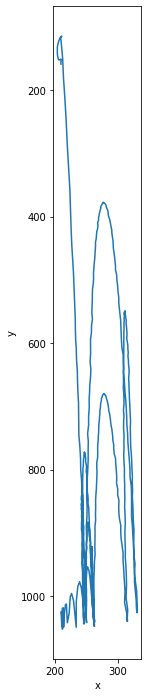

In [ ]:
plt.figure(figsize=[5,12])
trajectory = np.array(trajectory)
plt.plot(trajectory[:,1],trajectory[:,0])
plt.gca().invert_yaxis()
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal')
plt.show()